# Introduction

One of the comments by our manuscript reviewers was on our claim of the 2009 H1N1 and 2013 H7N9 viruses. In order to substantiate our claim of recapitulating their lineages, I will draw their subtypic lineage traces.

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict
from datetime import datetime
from random import randint

%matplotlib inline

In [2]:
G = nx.read_gpickle('20150902_all_ird Final Graph.pkl')

In [3]:
G.nodes(data=True)[0]

('A/swine/Netherlands/Kootwijkerbroek-364/2012',
 {'collection_date': Timestamp('2012-10-19 00:00:00'),
  'country': 'Netherlands',
  'host_species': 'Swine',
  'reassortant': False,
  'subtype': 'H1N1'})

## 2009 H1N1 lineage trace

We will first begin with a lineage trace for the 2009 pH1n1 strains. We will go one degree up, and figure out what subtypes are represented there.

In [50]:
pH1N1s = [n for n, d in G.nodes(data=True) if d['reassortant'] and d['subtype'] == 'H1N1' and d['host_species'] == 'Swine' and d['collection_date'].year == 2009]
len(pH1N1s)

6

In [41]:
pH1N1s[0:5]

['A/swine/Guangdong/1367/2010',
 'A/swine/Italy/278299_1/2012',
 'A/swine/Scotland/034632/2012',
 'A/swine/England/1251/2011',
 'A/swine/Hong Kong/3904/2011']

In [40]:
ancestors = defaultdict(list)  # a dictionary of number of degrees up and a list of nodes.

for n in pH1N1s:
    predecessors = G.predecessors(n)
    ancestors[1].extend(predecessors)
    
ancestors[1][0:5]

['A/Singapore/DMS19/2009',
 'A/swine/Hong Kong/NS1179/2007',
 'A/swine/Italy/224790-2/2012',
 'A/swine/Spain/SF11131/2007',
 'A/swine/England/000304/2009']

In [39]:
ancestors_subtypes = defaultdict(set)

for deg, parents in ancestors.items():
    for parent in parents:
        ancestors_subtypes[deg].add(G.node[parent]['subtype'])
    
ancestors_subtypes

defaultdict(set, {1: {'H1N1', 'H1N2', 'H3N2', 'H9N2'}})

Let's now draw them using `matplotlib`.

[None, None, None, None, None, None, None, None]

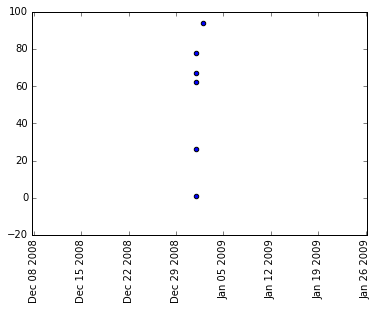

In [58]:
xs = [G.node[n]['collection_date'] for n in pH1N1s]
ys = [randint(1,100) for n in pH1N1s]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys)
labels = ax.get_xticklabels()
plt.setp(labels, rotation='vertical')
